In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Get CSV data and convert to dataframe
df = pd.read_csv("course-data.csv", sep="\t")

df

,Name,Level,School Year,Year,Term,Type,Department,Prof-gender,Grade,Fun
0,Newtonian Physics,100,Freshman,2018,Fall,"Lecture, Lab",PHYS,F,A-,3.0
1,The Atlantic World,100,Freshman,2018,Fall,"Lecture, Discussion",HIST,M,B+,3.0
2,Anti-Heroes,FYS,Freshman,2018,Fall,Discussion,ENAM,M,A-,3.0
3,Calculus II,100,Freshman,2018,Fall,Lecture,MATH,F,A-,2.0
4,Privledge and Poverty,1000,Freshman,2019,Winter,Discussion,RELI,M,A,2.0
5,The 20th Century British Novel,200,Freshman,2019,Spring,Lecture,ENAM,M,A-,4.0
6,Early Modern Europe,200,Freshman,2019,Spring,"Lecture, Discussion",HIST,M,A,5.0
7,"Waves, Fluids, Optics, and Thermodynamics",100,Freshman,2019,Spring,"Lecture, Lab",PHYS,F,B+,2.0
8,Intro to Microeconomics,100,Freshman,2019,Spring,Lecture,ECON,F,B+,1.0
9,Russian Literature,200,Sophomore,2019,Fall,Discussion,RUSS,M,A,4.0


In [19]:
""" Utility Functions """
def get_grade(grade):
    if (grade == "A"):
        return 4.0
    elif (grade == "A-"):
        return 3.66
    elif (grade == "B+"):
        return 3.33
    return 0

def parse_type(types, result):
    split_types = types.split(',')

    for type in split_types:
        clean_type = type.replace(' ', '')

        if (clean_type == "Lecture"):
            result["Lecture"] += 1
        elif (clean_type == "Discussion"):
            result["Discussion"] += 1
        elif (clean_type == "Groupwork"):
            result["Groupwork"] += 1
        elif (clean_type == "Lab"):
            result["Lab"] += 1
    
    return result

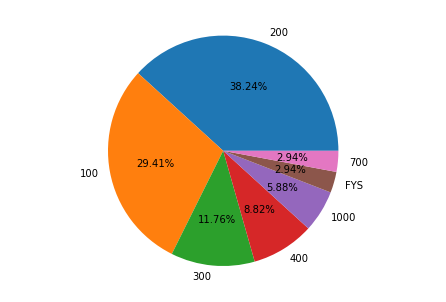

In [3]:
""" Level """

# Processing Data
counts = df.loc[:, "Level"].value_counts()
levels = counts.index

# Displaying Data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(counts,labels = levels, autopct='%1.2f%%')
plt.show()

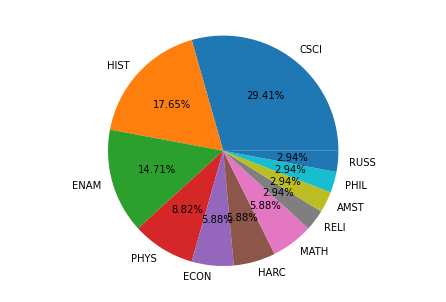

In [4]:
""" Departments """

# Processing Data
counts = df.loc[:, "Department"].value_counts()
departments = counts.index

# Displaying Data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(counts,labels = departments, autopct='%1.2f%%')
plt.show()

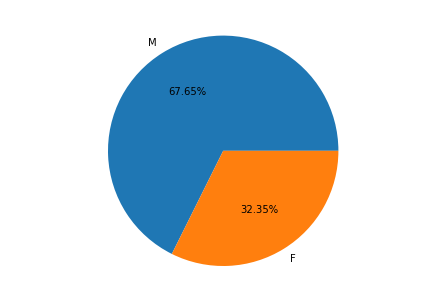

In [5]:
""" Gender """

# Processing Data
counts = df.loc[:, "Prof-gender"].value_counts()
labels = counts.index

# Displaying Data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(counts,labels = labels, autopct='%1.2f%%')
plt.show()

<ipython-input-6-a423b1c43944>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data["GPA"] = year_data["Grade"].apply(get_grade)


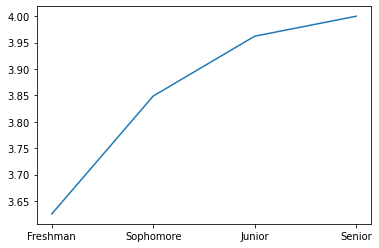

In [6]:
""" Grades """

# Processing Data
school_years = df["School Year"].unique()
gpas_by_year = []
df_for_grades = df[:30]

for year in school_years:
    year_data = df_for_grades.loc[df_for_grades["School Year"] == year]
    year_data["GPA"] = year_data["Grade"].apply(get_grade)
    gpas_by_year.append(year_data["GPA"].mean())

# Displaying Data
plt.plot(school_years, gpas_by_year)
plt.show()


In [29]:
""" TYPE """

# Gathering Data
result = {
    "Groupwork" : 0,
    "Lecture" : 0,
    "Discussion" : 0,
    "Lab" : 0,
}

for item in df["Type"]:
    result = parse_type(item, result)

data = []
labels = []

for key, value in result.items():
    data.append(value)
    labels.append(key)

# Displaying Results
plt.pie(data, labels = labels)
plt.show()

[4, 27, 11, 4]
['Groupwork', 'Lecture', 'Discussion', 'Lab']
